In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# data = pd.ExcelFile("/content/Boat Attack Survey Results.xlsx")
### Manually upload spreadsheet
file_name = "Boat Attack Survey Results.csv" 
df = pd.read_csv(file_name)
df.drop(['Lap ID', 'Device Type', 'Device Model','Device UID','Operating System','Processor', 'Survey Code', 'Timestamp (UTC)'], axis=1, inplace=True)
df.head()

,Question 1,Question 2,Question 3,Question 4,FPS,Resolution Scale,Latency,FPS Variance
0,3,4,4,3,30,80,5,15
1,3,4,4,3,30,80,0,15
2,2,4,1,2,60,80,15,0
3,2,4,1,1,60,80,5,5
4,2,4,2,3,30,80,0,15


In [2]:
X = df[['FPS', 'Resolution Scale', 'Latency', 'FPS Variance']]
y = df['Question 1']

In [3]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from dtreeviz.trees import dtreeviz

|--- feature_0 <= 45.00
|   |--- feature_3 <= 10.00
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_1 <= 60.00
|   |   |   |   |--- class: 3
|   |   |   |--- feature_1 >  60.00
|   |   |   |   |--- feature_1 <= 100.00
|   |   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_3 >  2.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  100.00
|   |   |   |   |   |--- class: 3
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_2 <= 10.00
|   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_3 >  2.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- feature_2 >  10.00
|   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_3 >  2.50
|   |   |   |   |   |--- class: 4
|   |--- feature_3 >  10.00
|   |   |--- feature_2 <= 2.50
|   |   |   |--- class: 2
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_2

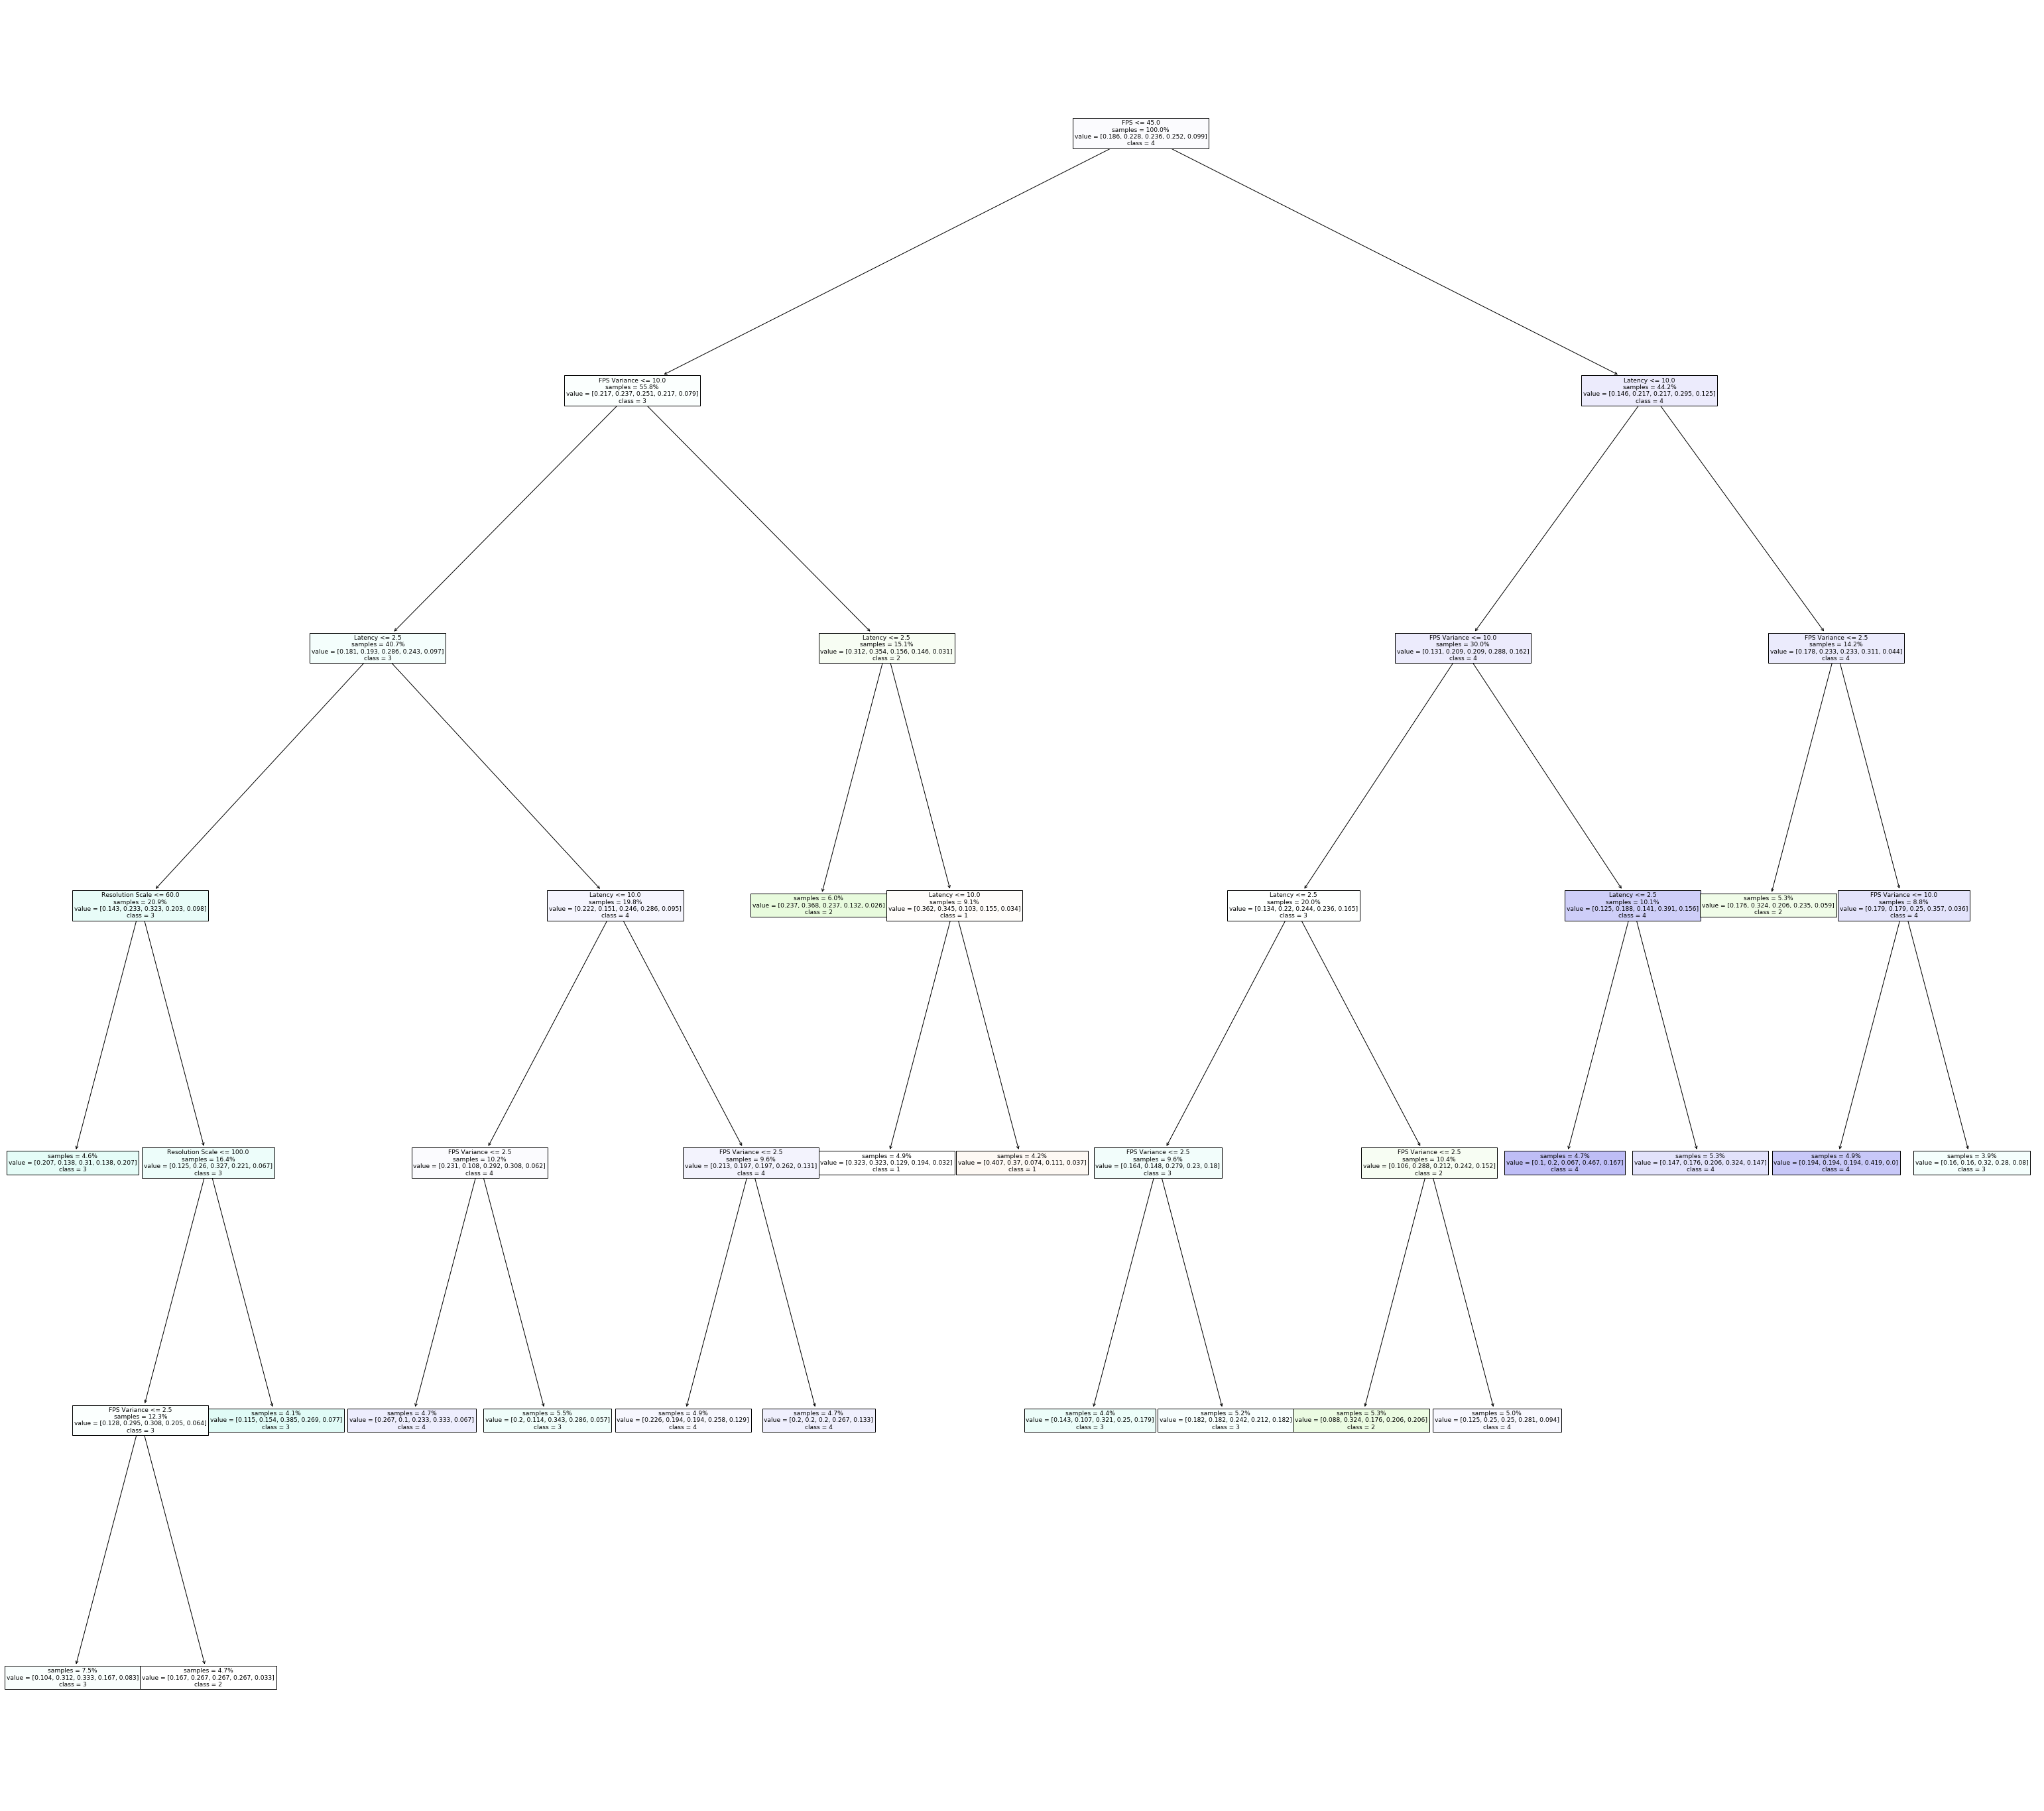

In [6]:
clf = DecisionTreeClassifier(max_depth = 6)
model = clf.fit(X, y)

fig = plt.figure(figsize=(55,50))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=['1', '2','3','4', '5'], 
                   impurity=False,
                   proportion=True,
                   filled=True)
fig.savefig("decision_tree_classifier.png")
viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=X.columns,
                class_names=['1', '2','3','4', '5'])
viz.save("decision_tree.svg")
text_representation = tree.export_text(model)
print(text_representation)
model.score(X, y)
print(model.predict(np.array([30, 80, 5, 15]).reshape(1, -1)))

[2.29032258]


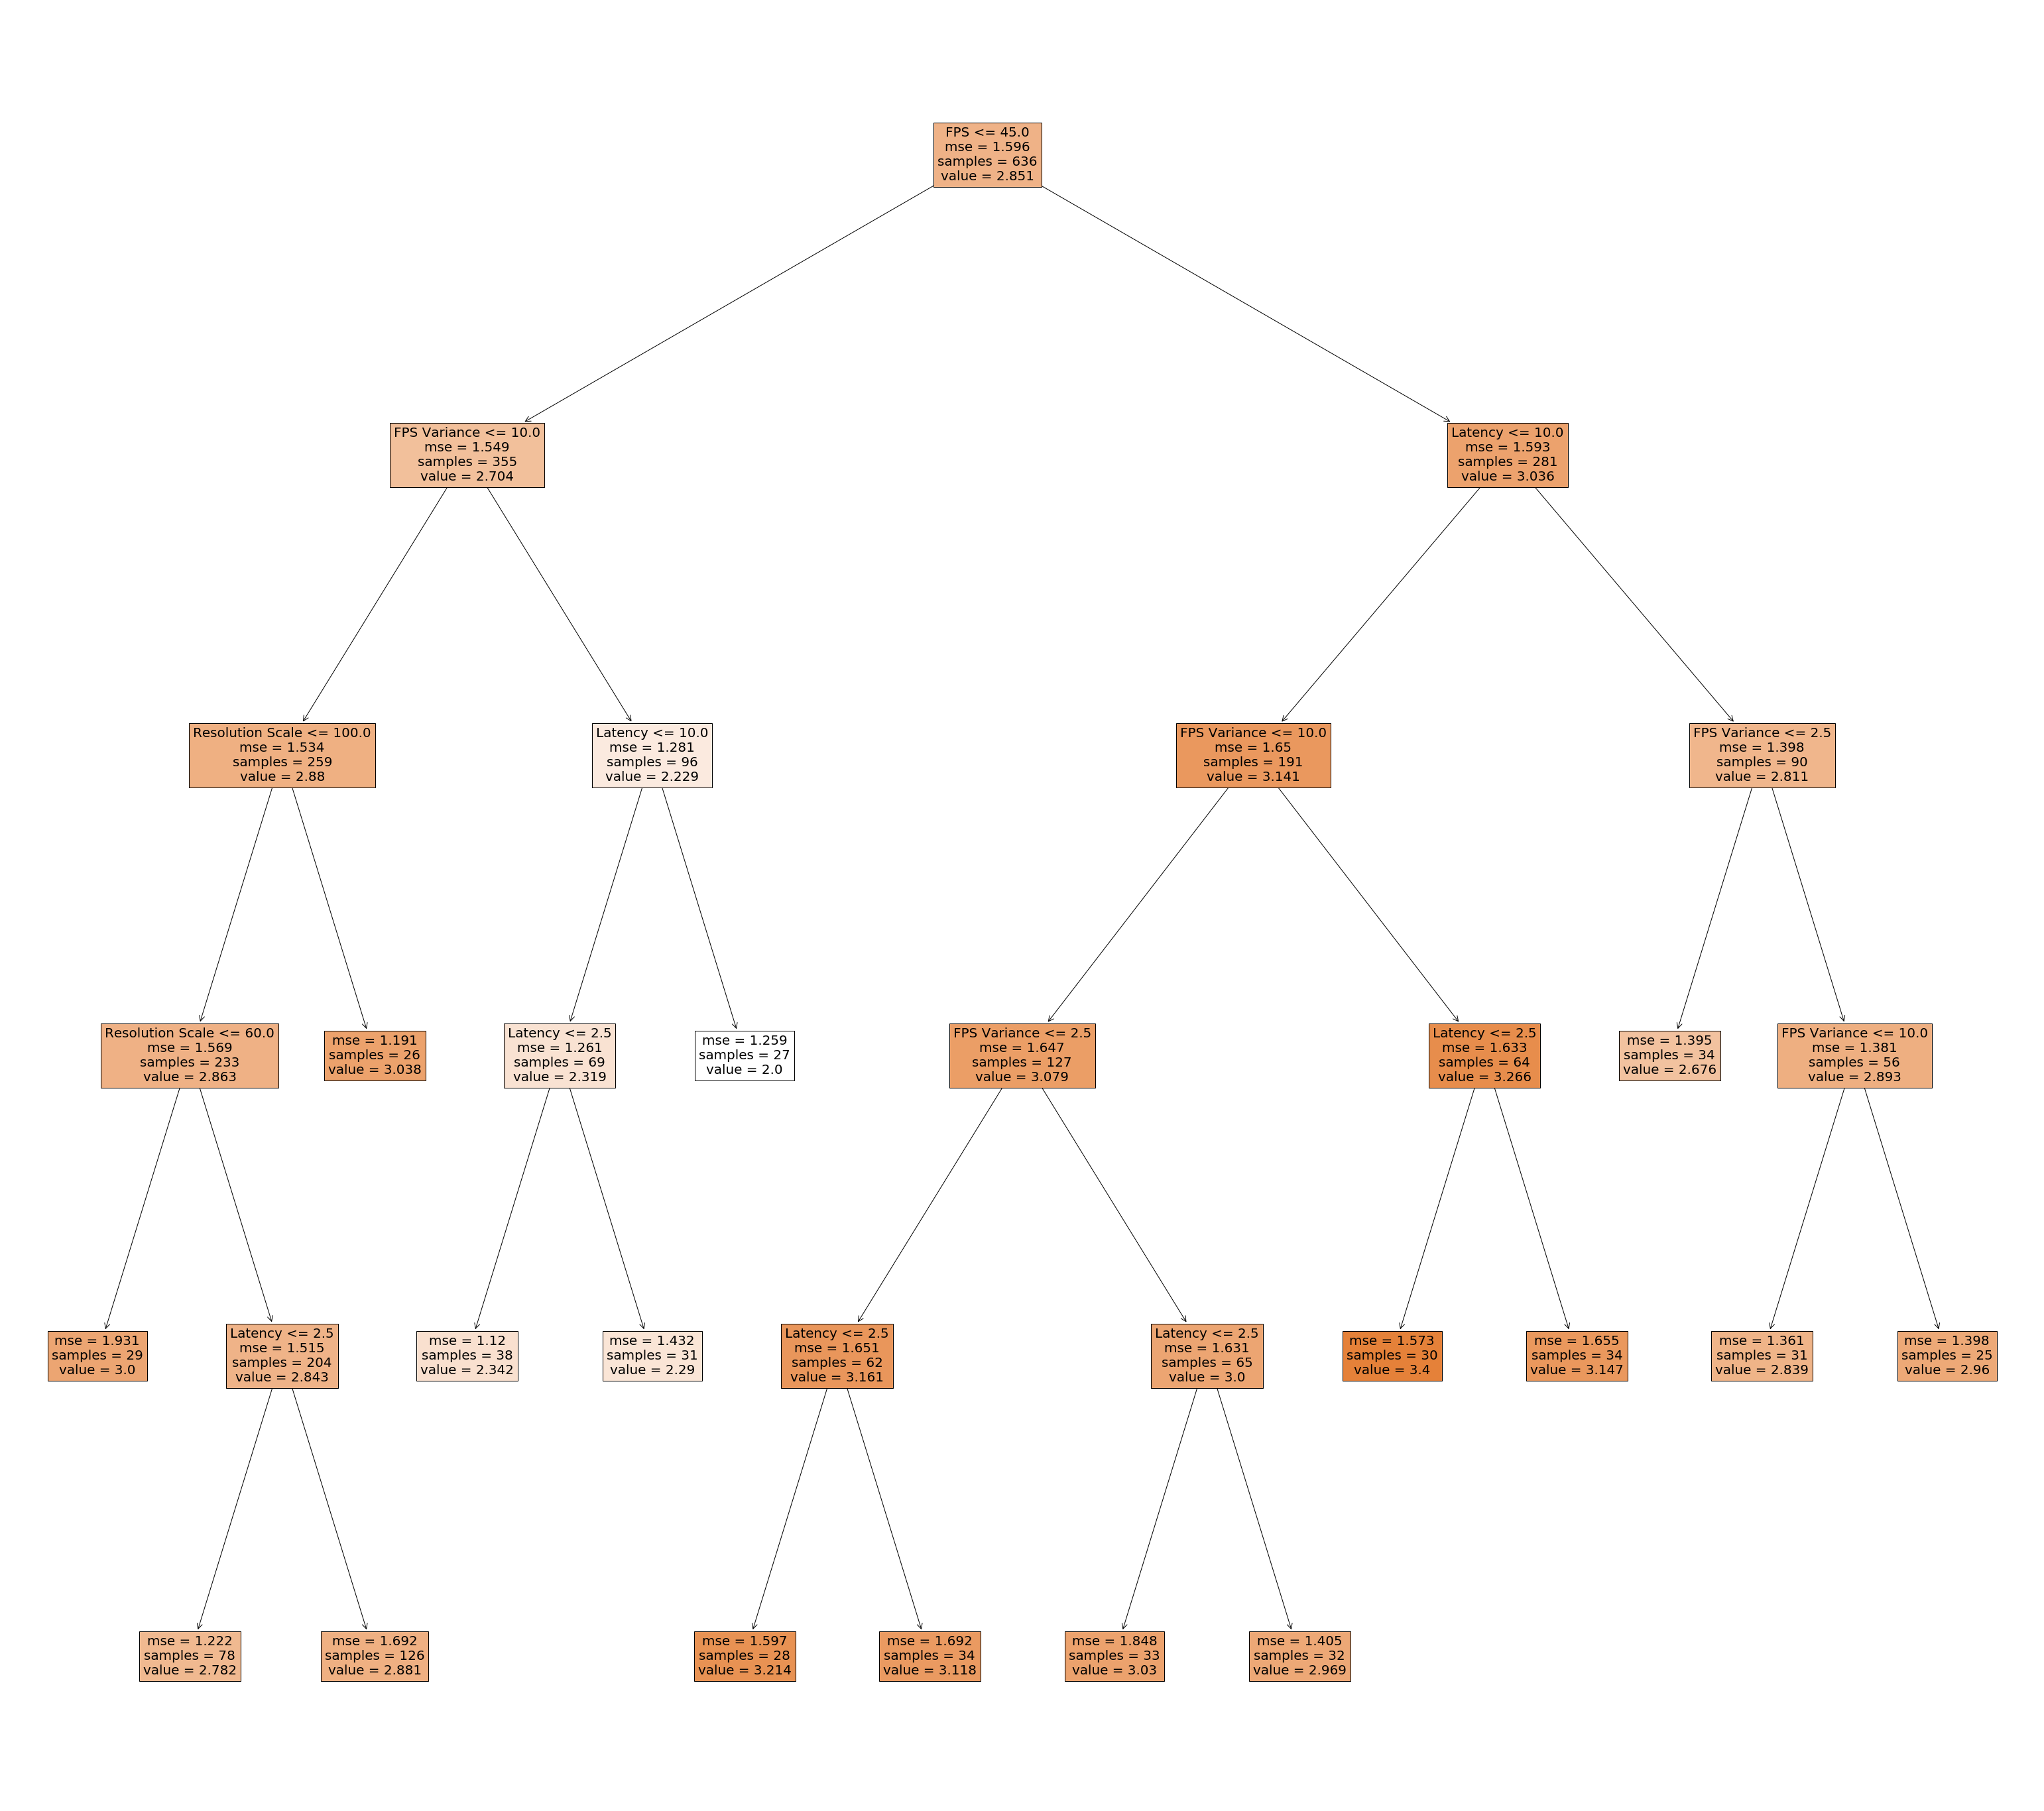

In [7]:
clf = DecisionTreeRegressor(max_depth = 5)
model = clf.fit(X, y)

fig = plt.figure(figsize=(55,50))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
#                    class_names=['1', '2','3','4', '5'], 
                   filled=True)
fig.savefig("decistion_tree_regressor.png")
text_representation = tree.export_text(clf)
# print(text_representation)
model.score(X, y)
print(model.predict(np.array([30, 80, 5, 15]).reshape(1, -1)))